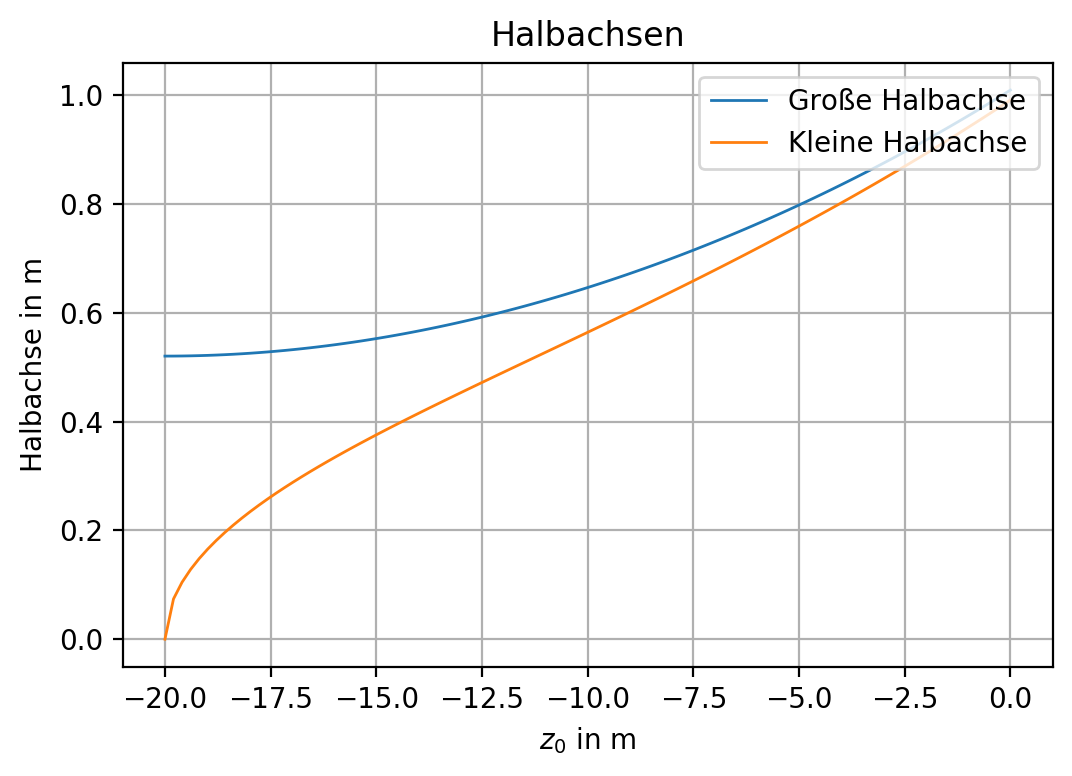

In [1]:
import numpy as np
import matplotlib.pyplot as plt

k = 0.1
w = 1
x0 = 0
H = 20
z0 = np.linspace(-H,0,100)
A = 1

a = np.sqrt(np.exp(k*z0) + np.exp(-k*z0-2*k*H))
b = np.sqrt(np.exp(k*z0) - np.exp(-k*z0-2*k*H))

##3d

plt.figure(dpi = 200)
plt.title("Halbachsen")
plt.grid()
plt.ylabel("Halbachse in m")
plt.xlabel("$z_0$ in m")
plt.plot(z0,a,linewidth= 1, label = "Große Halbachse")
plt.plot(z0,b,linewidth= 1, label = "Kleine Halbachse")
plt.legend(loc = "upper right")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


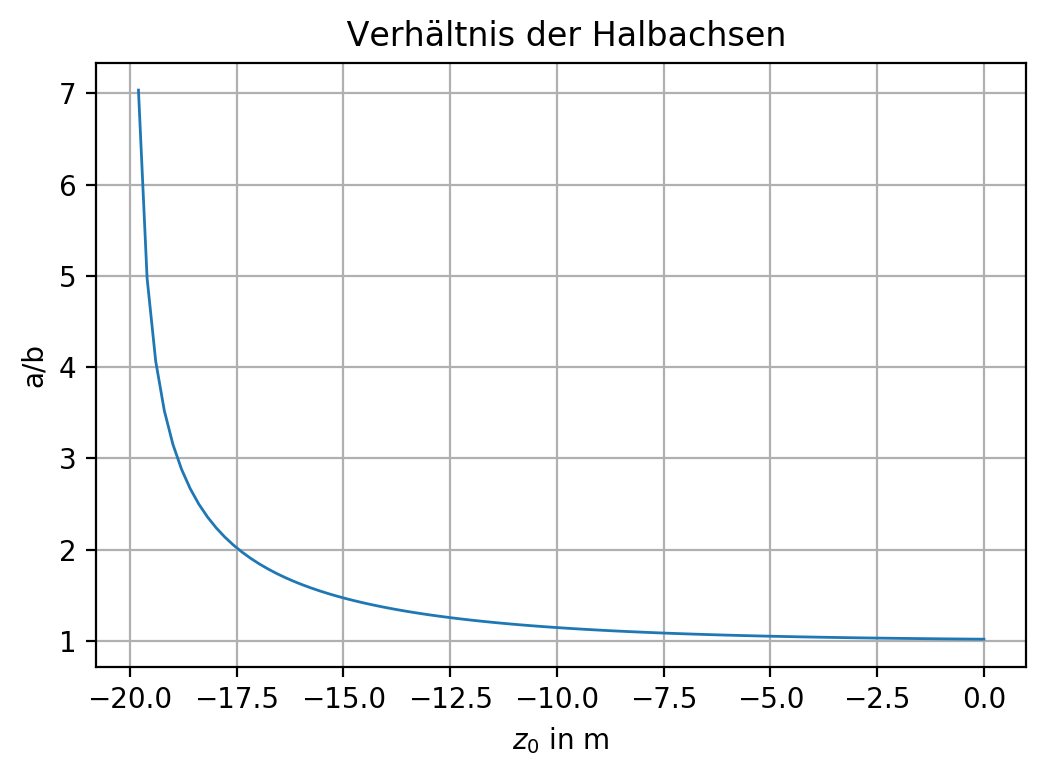

In [2]:
plt.figure(dpi = 200)
plt.title(" Verhältnis der Halbachsen")
plt.grid()
plt.ylabel("a/b")
plt.xlabel("$z_0$ in m")
plt.plot(z0,a/b,linewidth= 1)


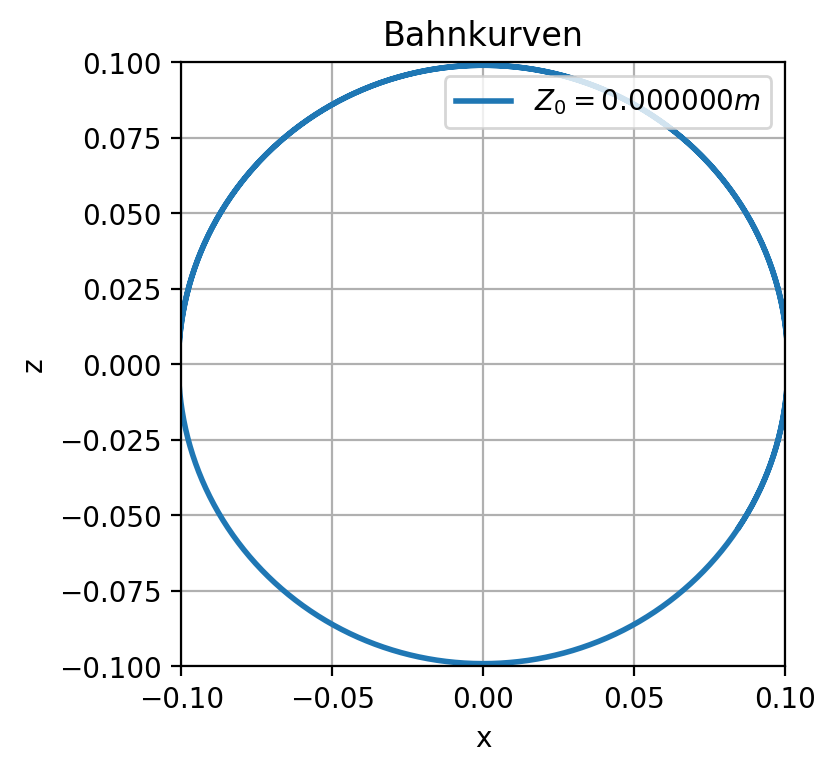

In [5]:
## Bahnkurven

import random
from matplotlib import animation

z0 = np.linspace(-H,0,100)



##functions for the ellipsis
def X(t,z0):
    return -A*k*np.cos(k*x0-w*t)*np.sqrt(np.exp(k*z0) + np.exp(-k*z0-2*k*H)) + x0

def Z(t,z0):
    return -A*k*np.sin(k*x0-w*t)*np.sqrt(np.exp(k*z0) - np.exp(-k*z0-2*k*H)) + z0

t = np.linspace(0,10,1000)

fig = plt.figure(dpi = 200)
ax = plt.axes()
ax.set_aspect('equal')
line, = ax.plot([], [], lw=2)


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    ax.clear()
  

    
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.1+z0[i],0.1+z0[i])
    ax.plot(X(t,z0[i]),Z(t,z0[i]),label = "$Z_0=%f m$" %z0[i],linewidth = 2)
    
    plt.title("Bahnkurven")
    plt.grid()
    plt.ylabel('z')
    plt.xlabel('x')
    plt.legend(loc=1)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
anim.save('3d_bahnkurve.mp4', fps=10, extra_args=['-vcodec', 'libx264'])

plt.show()
